In [2]:
import pandas as pd
import matplotlib as plt
from sqlalchemy import create_engine

# Database connection parameters
db_user = 'root'
db_password = 'Haritha%4003'
db_host = 'localhost'
db_name = 'expense_tracker'

# Create a database connection
engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}')

# Define SQL query to fetch data
query = "SELECT * FROM expenses"

df_expenses = pd.read_sql(query, engine)


print(df_expenses.head())


   id  user_id  amount       category        date              description  \
0   1        1   50.75      Groceries  2024-08-25  Weekly grocery shopping   
1   2        1   20.00      Transport  2024-08-26                 Bus fare   
2   3        2  100.00      Utilities  2024-08-27         Electricity bill   
3   4        2   75.50         Dining  2024-08-28   Dinner at a restaurant   
4   5        2   60.00  Entertainment  2024-08-28            Movie tickets   

           created_at  
0 2024-08-26 17:18:02  
1 2024-08-26 17:18:49  
2 2024-08-26 17:19:30  
3 2024-08-26 17:20:06  
4 2024-08-27 11:08:47  


             id   user_id      amount                 date  \
count  9.000000  9.000000    9.000000                    9   
mean   5.000000  2.444444   94.027778  2024-08-28 10:40:00   
min    1.000000  1.000000   20.000000  2024-08-25 00:00:00   
25%    3.000000  2.000000   60.000000  2024-08-27 00:00:00   
50%    5.000000  2.000000   80.000000  2024-08-28 00:00:00   
75%    7.000000  3.000000  100.000000  2024-08-30 00:00:00   
max    9.000000  4.000000  250.000000  2024-09-01 00:00:00   
std    2.738613  1.130388   65.292424                  NaN   

                          created_at  
count                              9  
mean   2024-08-27 03:13:22.444444672  
min              2024-08-26 17:18:02  
25%              2024-08-26 17:19:30  
50%              2024-08-27 11:08:47  
75%              2024-08-27 11:08:47  
max              2024-08-27 11:08:47  
std                              NaN  
category
Health           250.00
Utilities        180.00
Groceries        140.75
Transport

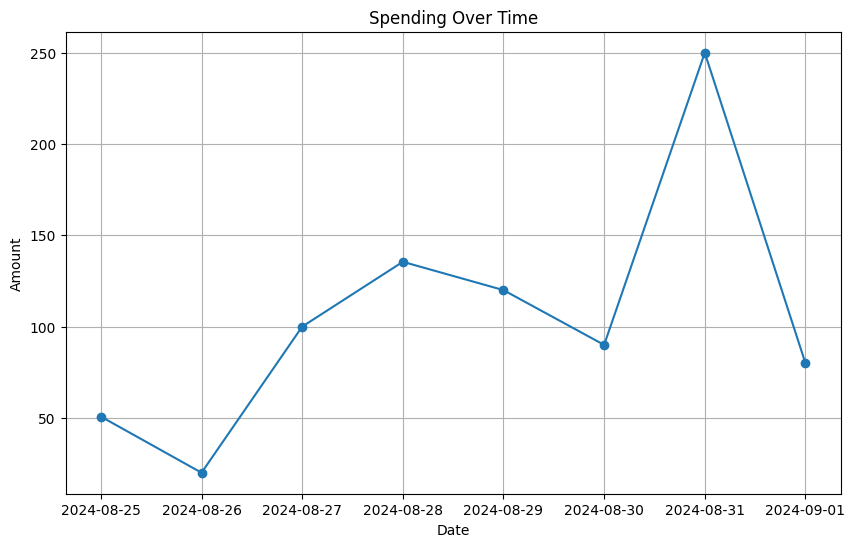

In [6]:
# Assuming df_expenses is your DataFrame
df_expenses['date'] = pd.to_datetime(df_expenses['date'])
df_expenses['created_at'] = pd.to_datetime(df_expenses['created_at'])

# Summary Statistics
print(df_expenses.describe())

# Spending by Category
spending_by_category = df_expenses.groupby('category')['amount'].sum().sort_values(ascending=False)
print(spending_by_category)

# Spending Over Time
spending_over_time = df_expenses.groupby('date')['amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(spending_over_time.index, spending_over_time.values, marker='o')
plt.title('Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


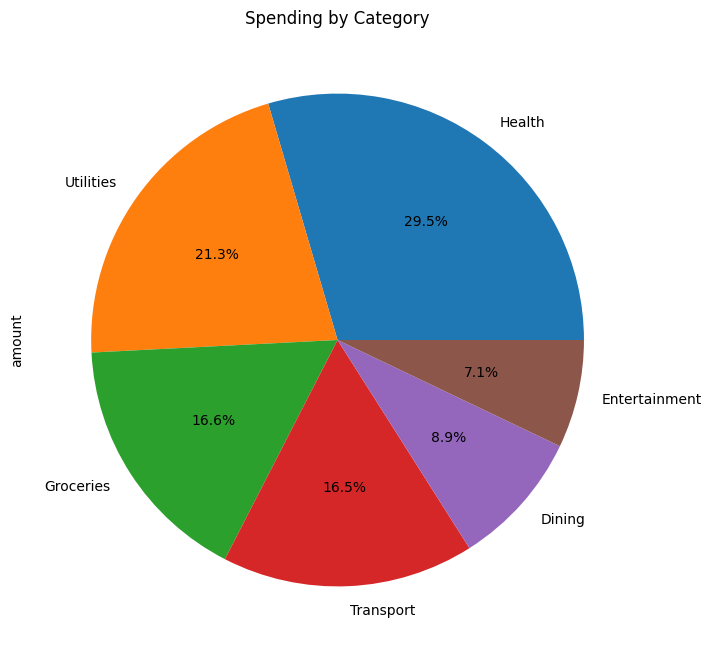

In [10]:
spending_by_category.plot(kind='pie' , autopct='%1.1f%%', figsize=(8,8), title='Spending by Category')
plt.show()

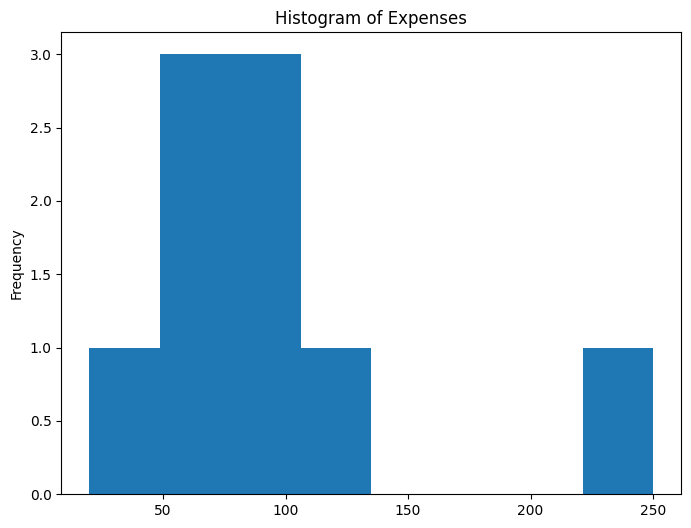

In [12]:
df_expenses['amount'].plot(kind='hist',bins=8,figsize=(8,6), title='Histogram of Expenses')
plt.show()